<a href="https://colab.research.google.com/github/nhut-ngnn/MAI391_Project/blob/main/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew,boxcox_normmax, zscore

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/MAI391_ComputerProject/train.csv")

### Data Visualization ###

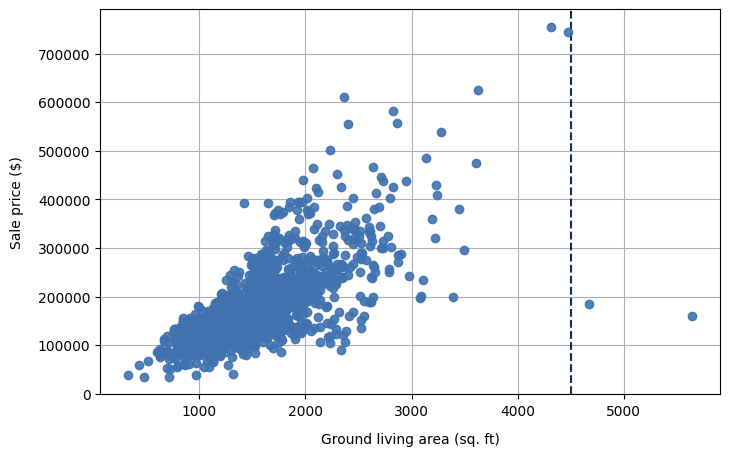

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.grid()
ax.scatter(df_train["GrLivArea"], df_train["SalePrice"], c="#3f72af", zorder=3, alpha=0.9)
ax.axvline(4500, c="#112d4e", ls="--", zorder=2)
ax.set_xlabel("Ground living area (sq. ft)", labelpad=10)
ax.set_ylabel("Sale price ($)", labelpad=10)
plt.show()

#### Removing Outliers identified from above graph ####

In [ ]:
df_train = df_train[df_train["GrLivArea"]<4450]

#### Bar Graph to check number of missing values ####

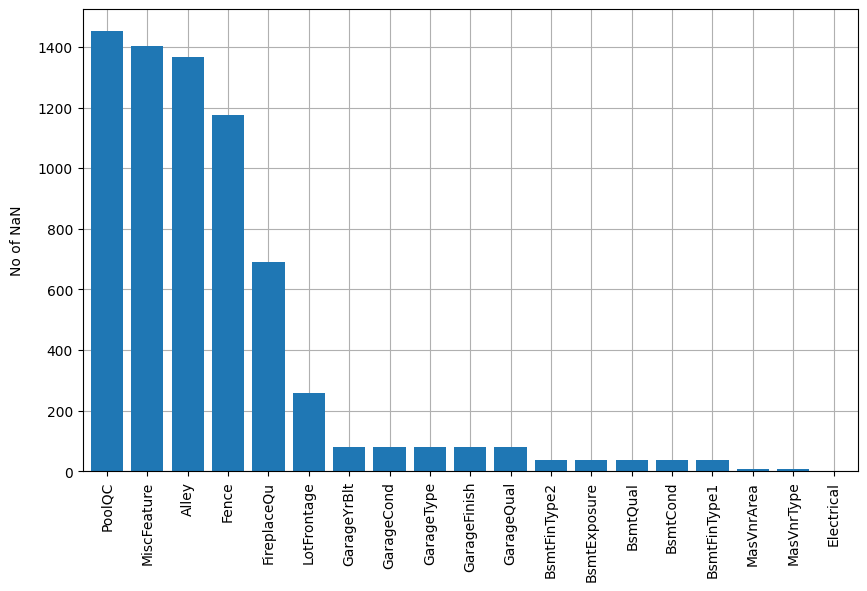

In [ ]:
nans = df_train.isna().sum().sort_values(ascending=False)
nans = nans[nans>0]
fig, ax = plt.subplots(figsize=(10,6))
ax.grid()
ax.bar(nans.index, nans.values, zorder=2)
ax.set_ylabel("No of NaN", labelpad=10)
ax.set_xlim(-0.6, len(nans) - 0.4)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [ ]:
df_train.isna().sum()[df_train.isna().sum()>0]

LotFrontage      259
Alley           1366
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1452
Fence           1177
MiscFeature     1403
dtype: int64

In [ ]:
columns_with_missing_values = df_train.columns[df_train.isnull().any()]
columns_with_missing_values

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
missing_percentage = (df_train[columns_with_missing_values].isnull().sum() / len(df_train)) * 100
columns_to_remove = missing_percentage[missing_percentage > 50].index
df_train = df_train.drop(columns=columns_to_remove)

#### Numerical Columns ####

In [ ]:
NUMBERICAL_COLS=[]
for feature in df_train:
    if df_train[feature].dtype!='O' and feature!= 'SalePrice':
        NUMBERICAL_COLS.append(feature)

DISCRETE_VAR=[]
for feature in NUMBERICAL_COLS:
    if len(df_train[feature].unique())<=25 and feature != 'SalePrice':
        DISCRETE_VAR.append(feature)

print(DISCRETE_VAR)

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [ ]:
CONTINUOUS_VAR=[]
for feature in NUMBERICAL_COLS:
    if feature not in DISCRETE_VAR and feature not in ["Id","YearBuilt","YearRemodAdd","GarageYrBlt","YrSold"]:
        CONTINUOUS_VAR.append(feature)

print(CONTINUOUS_VAR)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']


In [ ]:
CATEGORY_COLS=[]
for feature in df_train.columns:
    if df_train[feature].dtype=='O'and feature!= 'SalePrice':
        CATEGORY_COLS.append(feature)
print(CATEGORY_COLS)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


<Axes: >

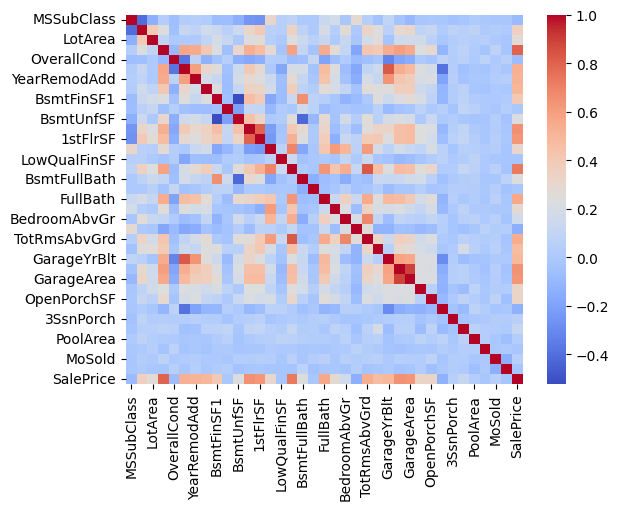

In [ ]:
numeric_columns_with_SalePrice = df_train.drop(["Id"], axis = 1).select_dtypes(include=['number']).columns
numeric_columns = df_train.drop(["SalePrice","Id"], axis = 1).select_dtypes(include=['number']).columns
categorical_columns = df_train.drop(["SalePrice"], axis = 1).select_dtypes(include=['object']).columns
dropped_column = []

sns.heatmap(df_train[numeric_columns_with_SalePrice].corr(), cmap = "coolwarm")

In [ ]:
numeric_columns_correled = []

for x in NUMBERICAL_COLS:
    correlation = df_train[x].corr(df_train['SalePrice'])
    if abs(correlation) > 0.1:
        numeric_columns_correled.append(x)
    else :
        dropped_column.append(x)


dropped_column.append('Id')
dropped_column_with_SalePrice = [col for col in dropped_column if col != "SalePrice"]
dropped_column.append('SalePrice')

In [ ]:
for i in NUMBERICAL_COLS:
  median_values = df_train[i].median()
  df_train[i] = df_train[i].fillna(value=median_values)
  median_values = 0
df_train.isnull().sum().sort_values(ascending=False)

FireplaceQu     690
GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
               ... 
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
MSSubClass        0
SalePrice         0
Length: 77, dtype: int64

In [ ]:
for i in CATEGORY_COLS:
  mode_values = df_train[i].mode().iloc[0]
  df_train[i] = df_train[i].fillna(mode_values)
df_train.isnull().sum().sort_values(ascending=False)

Id             0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 77, dtype: int64

In [ ]:
df_train.to_csv("data.csv")

In [ ]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
y = df_train["SalePrice"]

X = pd.get_dummies(df_train).drop(dropped_column_with_SalePrice, axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,  test_size=0.2, random_state=0)

<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Standard Scaler Formula</title>
</head>
<body>
    <h2><b>Standard Scaler Formula</b></h2>
    <p>The formula for StandardScaler is:</p>
    <h2><code>z = (x - &mu;) / &sigma;</code></h2>
    <p>Where:</p>
    <ul>
        <li><em>z</em> is the standardized value.</li>
        <li><em>x</em> is the original value.</li>
        <li>&mu; is the mean of the feature values.</li>
        <li>&sigma; is the standard deviation of the feature values.</li>
    </ul>
    <p>In mathematical terms, you subtract the mean (&mu;) from each feature value (x) and then divide by the standard deviation (&sigma;). This centers the distribution around zero and scales it to have a standard deviation of 1.</p>
</body>
</html>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>MinMax Scaler Formula</title>
</head>
<body>
    <h2><b>MinMax Scaler Formula</b></h2>
    <p>The formula for MinMaxScaler is:</p>
    <h2><code> x_scaled = (x - x_min) / (x_max - x_min)</code></h2>
    <p>Where:</p>
    <ul>
        <li><em>x</em> is the original value.</li>
        <li><em>x_scaled</em> is the scaled value.</li>
        <li>x_min is the minimum value of the feature.</li>
        <li>x_max is the maximum value of the feature.</li>
        <li><em>min</em> is the minimum value of the desired range after scaling (typically 0).</li>
        <li><em>max</em> is the maximum value of the desired range after scaling (typically 1).</li>
    </ul>
    <p>In mathematical terms, MinMaxScaler scales the data to a fixed range (typically between 0 and 1) by linearly transforming each feature such that the minimum value becomes 0 and the maximum value becomes 1.</p>
</body>
</html>


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.fit_transform(X_test[numeric_features])

prepro_y = MinMaxScaler()
y_train = np.array(y_train).reshape((-1, 1))
y_train_scaled = prepro_y.fit_transform(y_train)
y_train_scaled = y_train_scaled.astype('float32')

y_test = np.array(y_test).reshape((-1, 1))
y_test_scaled = y_test.astype('float32')

X_test = X_test.astype(float)
X_train = X_train.astype(float)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train_scaled.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1165, 265)
Shape of X_test: (292, 265)
Shape of y_train: (1165, 1)
Shape of y_test: (292, 1)


#### MODEL 1

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, losses, metrics, callbacks, regularizers

model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(X_train.shape[1],)))


model.add(tf.keras.layers.Dense(1024, activation='relu', kernel_initializer='HeUniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(512, activation='relu', kernel_initializer='HeUniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(256, activation='relu', kernel_initializer='HeUniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='HeUniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='HeUniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation='relu', kernel_initializer='HeUniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1))


In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
model.compile(optimizer="Adam", loss="mean_squared_error",metrics=["mean_absolute_error"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              272384    
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

In [ ]:
import matplotlib.pyplot as plt
history = model.fit(X_train, y_train_scaled,
                    batch_size=32, epochs=300,
                    callbacks=[early_stopping],
                    validation_data=())

Epoch 1/300
37/37 [==============================] - 9s 10ms/step - loss: 42.0786 - mean_absolute_error: 1.4620
Epoch 2/300
37/37 [==============================] - 0s 9ms/step - loss: 39.1900 - mean_absolute_error: 1.2940
Epoch 3/300
37/37 [==============================] - 0s 9ms/step - loss: 37.1784 - mean_absolute_error: 1.0995
Epoch 4/300
37/37 [==============================] - 0s 9ms/step - loss: 35.7321 - mean_absolute_error: 0.9443
Epoch 5/300
37/37 [==============================] - 0s 8ms/step - loss: 34.5125 - mean_absolute_error: 0.8653
Epoch 6/300
37/37 [==============================] - 0s 9ms/step - loss: 33.3870 - mean_absolute_error: 0.7986
Epoch 7/300
37/37 [==============================] - 0s 9ms/step - loss: 32.3108 - mean_absolute_error: 0.7113
Epoch 8/300
37/37 [==============================] - 0s 8ms/step - loss: 31.3045 - mean_absolute_error: 0.6862
Epoch 9/300
37/37 [==============================] - 0s 9ms/step - loss: 30.1832 - mean_absolute_error: 0.5952


In [ ]:
%cd /content/drive/MyDrive/MAI391_ComputerProject
model.save("model1.keras")

model = tf.keras.models.load_model('model1.keras')

/content/drive/MyDrive/MAI391_ComputerProject


In [ ]:
predictions_scaled = model.predict(X_test)
predictions_model1 = prepro_y.inverse_transform(np.array(predictions_scaled).reshape(len(predictions_scaled), 1))

10/10 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import r2_score
score_model1 = r2_score(y_test, predictions_model1)
print("The accuracy of our model is {}%".format(round(score_model1, 2) *100))

The accuracy of our model is 88.0%


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mean = np.mean(y_test)
mae = mean_absolute_error(y_test_scaled, predictions_model1)
mape = mean_absolute_percentage_error(y_test_scaled, predictions_model1)
mse = mean_squared_error(y_test_scaled, predictions_model1)
rmse = mse**(1/2)

comparison_model1_table = pd.DataFrame({
    'Metric': ["TEST MEAN",'MSE', 'RMSE', 'MAE', 'MAPE', 'R2_score'],
    'Neural Network': [mean,mse, rmse, mae, mape, score_model1]})

comparison_model1_table

,Metric,Neural Network
0,TEST MEAN,1.794641e+05
1,MSE,7.575777e+08
2,RMSE,2.752413e+04
3,MAE,1.853114e+04
4,MAPE,1.071675e-01
5,R2_score,8.755051e-01


### **1. MSE (Mean Squared Error)**
*- Đo lường độ chênh lệch trung bình giữa giá trị thực tế và giá trị dự đoán.*
<p>MSE = 1/n * Σ(y<sub>i</sub> - ŷ<sub>i</sub>)^2</p>

### **2. RMSE (Root Mean Squared Error)**
*- Căn bậc hai của MSE.*
<p>RMSE = √MSE</p>

### **3. MAE (Mean Absolute Error)**
*- Trung bình cộng của các sai số dự đoán tuyệt đối.*
<p>MAE = 1/n * Σ|y<sub>i</sub> - ŷ<sub>i</sub>|</p>

### **4. MAPE (Mean Absolute Percentage Error)**
*- Trung bình cộng của các sai số dự đoán phần trăm tuyệt đối.*
<p>MAPE = 1/n * Σ(|y<sub>i</sub> - ŷ<sub>i</sub>|/y<sub>i</sub>) * 100%</p>

### **5. R2Score (R-squared)**
*- Hệ số xác định, thể hiện tỷ lệ phần trăm biến động của biến mục tiêu được giải thích bởi các biến dự đoán.*
<p>R2Score = 1 - (Σ(y<sub>i</sub> - ŷ<sub>i</sub>)^2 / Σ(y<sub>i</sub> - ȳ)^2)</p>


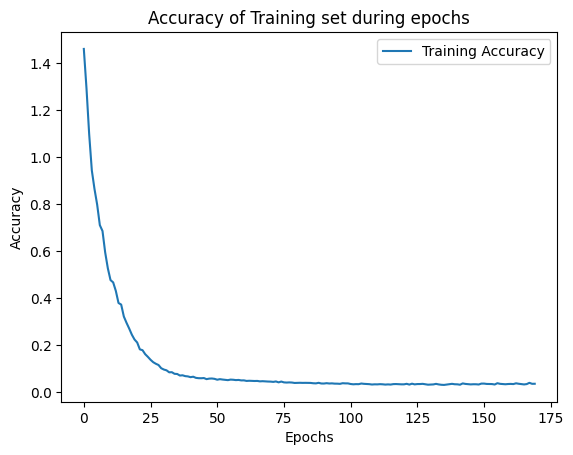

In [ ]:
plt.title("Accuracy of Training set during epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history["mean_absolute_error"], label="Training Accuracy")

plt.legend()
plt.show()

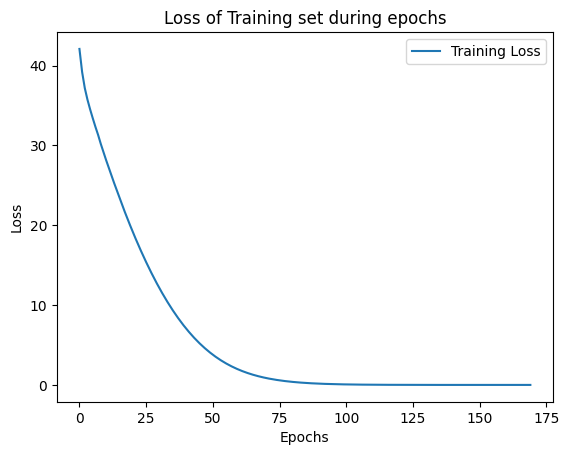

In [ ]:
plt.title("Loss of Training set during epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history["loss"], label="Training Loss")

plt.legend()
plt.show()

#### MODEL 2

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

k = 10

knn = KNeighborsRegressor(n_neighbors=k, algorithm='auto', weights="uniform", leaf_size=10)
knn.fit(X_train, y_train_scaled)

KNeighborsRegressor(leaf_size=10, n_neighbors=10)

In [ ]:
y_pred = knn.predict(X_test)

predictions_model2 = prepro_y.inverse_transform(np.array(y_pred).reshape(len(y_pred), 1))

# Đánh giá mô hình
score_model2 = r2_score(y_test, predictions_model2)
print("The accuracy of our model is {}%".format(round(score_model2, 2) *100))

The accuracy of our model is 85.0%


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mae2 = mean_absolute_error(y_test_scaled, predictions_model2)
mape2 = mean_absolute_percentage_error(y_test_scaled, predictions_model2)
mse2 = mean_squared_error(y_test_scaled, predictions_model2)
rmse2 = mse**(1/2)

comparison_model2_table = pd.DataFrame({
    'Metric': ["TEST MEAN", 'MSE', 'RMSE', 'MAE', 'MAPE', 'R2_score'],
    'KNN': [mean, mse2, rmse2, mae2, mape2, score_model2]})

comparison_model2_table

,Metric,KNN
0,TEST MEAN,1.794641e+05
1,MSE,8.914311e+08
2,RMSE,2.752413e+04
3,MAE,1.926148e+04
4,MAPE,1.076003e-01
5,R2_score,8.535086e-01


#### MODEL 3

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

base_model = DecisionTreeRegressor(max_depth=30)
model5 = AdaBoostRegressor(base_model, n_estimators=80, random_state=42)

model5.fit(X_train, y_train_scaled)

y_pred = model5.predict(X_test)

predictions_model3 = prepro_y.inverse_transform(np.array(y_pred).reshape(len(y_pred), 1))

# Đánh giá mô hình
score_model3 = r2_score(y_test, predictions_model3)
print("The accuracy of our model is {}%".format(round(score_model3, 5) *100))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of our model is 99.9%


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mae3 = mean_absolute_error(y_test_scaled, predictions_model3)
mape3 = mean_absolute_percentage_error(y_test_scaled, predictions_model3)
mse3 = mean_squared_error(y_test_scaled, predictions_model3)
rmse3 = mse**(1/2)

comparison_model3_table = pd.DataFrame({
    'Metric': ['TEST MEAN','MSE', 'RMSE', 'MAE', 'MAPE', 'R2_score'],
    'AdaBoostRegressor': [mean, mse3, rmse3, mae3, mape3, score_model3]})

comparison_model3_table


,Metric,AdaBoostRegressor
0,TEST MEAN,1.794641e+05
1,MSE,6.111139e+06
2,RMSE,2.752413e+04
3,MAE,1.525832e+03
4,MAPE,8.832140e-03
5,R2_score,9.989957e-01


## **Ensemble**

In [ ]:
weight_model1 = 0.3
weight_model2 = 0.1
weight_model3 = 0.6

In [ ]:
predictions_model4 = (
    weight_model1 * predictions_model1 +
    weight_model2 * predictions_model2 +
    weight_model3 * predictions_model3)

score_model4 = r2_score(y_test, predictions_model4)
print("The accuracy of our model is {}%".format(round(score_model4, 5) *100))

The accuracy of our model is 98.27%


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mae4 = mean_absolute_error(y_test_scaled, predictions_model4)
mape4 = mean_absolute_percentage_error(y_test_scaled, predictions_model4)
mse4 = mean_squared_error(y_test_scaled, predictions_model4)
rmse4 = mse**(1/2)

comparison_model3_table = pd.DataFrame({
    'Metric': ['TEST_MEAN', 'MSE', 'RMSE', 'MAE', 'MAPE', 'R2_score'],
    'Ensemble Model': [mean ,mse4, rmse4, mae4, mape4, score_model4]})

comparison_model3_table


,Metric,Ensemble Model
0,TEST_MEAN,1.794641e+05
1,MSE,1.052800e+08
2,RMSE,2.752413e+04
3,MAE,7.010670e+03
4,MAPE,4.153357e-02
5,R2_score,9.826990e-01


## **Comparision model**

In [ ]:
comparison_model_table = pd.DataFrame({
    'Metric': ['TEST_MEAN', 'MSE', 'RMSE', 'MAE', 'MAPE', 'R2_score'],
    'Neural Network': [mean ,mse, rmse, mae, mape, score_model1],
    'KNN': [mean, mse2, rmse2, mae2, mape2, score_model2],
    'AdaBoostRegressor': [mean, mse3, rmse3, mae3, mape3, score_model3],
    'Ensemble Model': [mean, mse4, rmse4, mae4, mape4, score_model4]})
comparison_model_table